# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

## Data Analysis

In [2]:
# Your code to create a clustering solution
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [3]:
data.isnull().sum()

A    0
B    0
C    0
dtype: int64

## Use PCA to create a 2D version of the features for visualization

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(data[data.columns[0:3]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

## Vizualize the unclustered data points


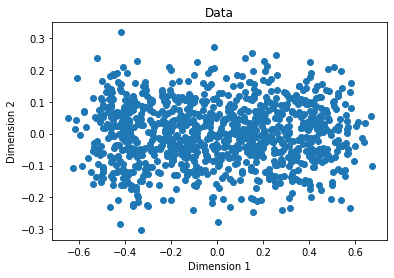

In [5]:
import matplotlib.pyplot as plt

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Data")
plt.show()

## Calculate WCSS for multiple cluster numbers to determine the right number of clusters

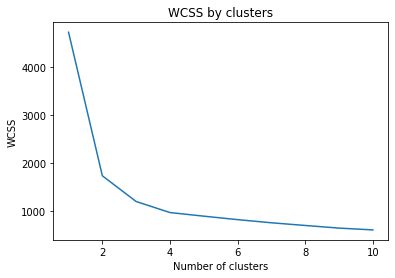

In [6]:
import numpy as np
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    #Fit the data points
    kmeans.fit(data)
    #Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph

plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("WCSS by clusters")
plt.show()

A metric often used to measure how tightly the data points are grouped within each cluster is - the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.
From above graph the value of 4 clusters seems suitable.

## Model Creation

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, init = 'k-means++', n_init=500, max_iter=1500)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data)
# View the cluster assignments
km_clusters

array([0, 0, 2, 2, 0, 0, 2, 3, 0, 0, 2, 1, 1, 3, 3, 3, 2, 1, 3, 3, 0, 3,
       0, 0, 3, 1, 2, 0, 1, 3, 1, 0, 2, 3, 3, 0, 3, 3, 0, 3, 3, 3, 2, 1,
       2, 0, 0, 2, 2, 3, 0, 1, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 3,
       1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 3, 3, 0, 1, 3, 1, 2, 1, 3, 2, 1, 3,
       3, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 1, 3, 1, 2, 1, 3, 1, 2, 3, 3, 2,
       3, 1, 0, 0, 1, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 1, 3, 2, 0, 1, 1,
       1, 3, 1, 1, 3, 0, 3, 1, 0, 1, 1, 0, 2, 2, 3, 2, 3, 3, 2, 0, 0, 3,
       0, 1, 0, 3, 3, 3, 1, 0, 2, 2, 3, 1, 1, 0, 0, 2, 0, 1, 3, 2, 3, 1,
       1, 3, 3, 0, 3, 0, 1, 1, 3, 2, 0, 2, 2, 1, 1, 0, 1, 3, 2, 1, 3, 3,
       0, 2, 1, 2, 2, 2, 0, 0, 2, 3, 2, 0, 2, 2, 1, 0, 2, 3, 3, 2, 0, 2,
       3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 3, 0, 1, 3, 0, 2, 2, 0, 2, 1, 2, 1,
       2, 3, 3, 1, 2, 0, 0, 3, 2, 3, 1, 1, 2, 2, 2, 0, 2, 0, 3, 2, 2, 3,
       0, 3, 1, 1, 1, 3, 2, 0, 3, 1, 0, 1, 2, 3, 3, 0, 2, 2, 1, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 3, 3, 1, 0, 2,

## Plot the clustered points

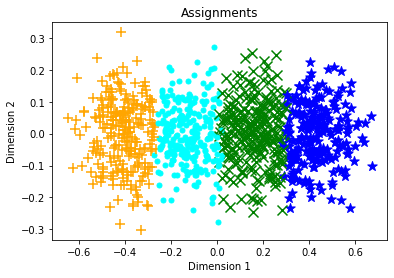

In [8]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

## With Agglomerative Clustering


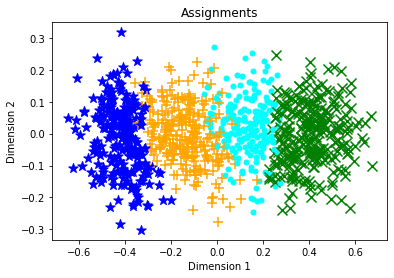

In [9]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters = 4)
agg_clusters = agg_model.fit_predict(data)
plot_clusters(features_2d,agg_clusters)